In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [3]:
train_df, predict_df,train_1, test_data = load_data('../data')

In [4]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        standardize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)


In [5]:
from sklearn.linear_model import LinearRegression

model_getter = lambda: LinearRegression()
model_trainer = lambda model, X, y: model.fit(X, y)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="Basic Linear Regression",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)


INFO:root:Fold 1/5
INFO:root:Train MAE: 3.2888, MAPE: 0.1349, MSE: 19.8811
INFO:root:Test MAE: 3.3023, MAPE: 0.1363, MSE: 19.9183
INFO:root:Fold 2/5
INFO:root:Train MAE: 3.3063, MAPE: 0.1359, MSE: 20.0028
INFO:root:Test MAE: 3.2989, MAPE: 0.1350, MSE: 20.0555
INFO:root:Fold 3/5
INFO:root:Train MAE: 3.2879, MAPE: 0.1350, MSE: 19.8568
INFO:root:Test MAE: 13078930.9997, MAPE: 472962.4400, MSE: 3169026984635324416.0000
INFO:root:Fold 4/5
INFO:root:Train MAE: 3.2986, MAPE: 0.1353, MSE: 19.9774
INFO:root:Test MAE: 3.2511, MAPE: 0.1330, MSE: 19.5773
INFO:root:Fold 5/5
INFO:root:Train MAE: 3.2839, MAPE: 0.1348, MSE: 19.8323
INFO:root:Test MAE: 4021197.3414, MAPE: 92446.1432, MSE: 299549275501566400.0000
INFO:root:
Best model from fold 4
INFO:root:Best model mae: 3.2511, mape: 0.1330 mse: 19.5773

INFO:root:Average mae: 3420027.6387, mape: 113081.7975, mse: 693715252027378176.0000
INFO:root:Std mae: 5074357.4747, mape: 183467.8688, mse: 1243081456970807296.0000


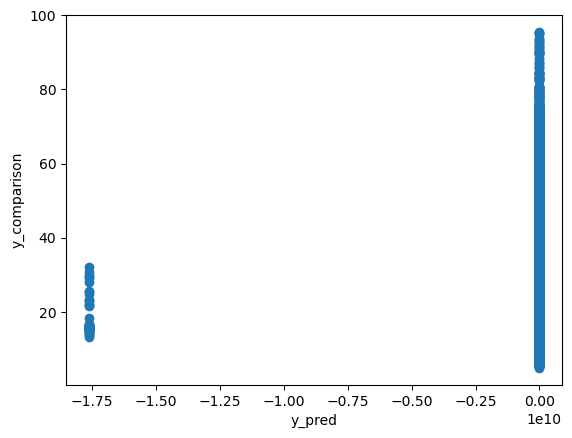

In [6]:
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])